<a href="https://colab.research.google.com/github/michalis0/MGT-502-Data-Science-and-Machine-Learning/blob/main/assignments/Part 1/Assignment_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSML investigation:
### You are part of the Suisse Impossible Mission Force, or SIMF for short. You need to uncover a rogue agent that is trying to steal sensitive information.

### Your mission, should you choose to accept it, is to find that agent before any classified information gets stolen. Good luck!


## Assignment part one

Airport security confiscated a laptop of a spy, which was later given to you. The laptop contains some documents that might be useful in the investigation process. You retrieve those documents and want to analyse them. Our intelligence shows that the person that we are looking for has visited the USA between Sept 2019 to Oct 2020. He is currently working undercover.


### Getting to know our data

We have retrieved from the laptop the following file:
- A list of suspects
- The flight records of these potential suspects



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
user_records = pd.read_csv("https://raw.githubusercontent.com/michalis0/MGT-502-Data-Science-and-Machine-Learning/refs/heads/main/assignments/Part%201/data/userRecords.csv")
travel_records = pd.read_csv("https://raw.githubusercontent.com/michalis0/MGT-502-Data-Science-and-Machine-Learning/refs/heads/main/assignments/Part%201/data/flightRecords.csv")

#### Shape of the data

Let's first check how many rows and columns (features) are in the user records

In [3]:
user_records.shape

(957, 8)

**Q1. How many rows are there in the user records dataset?**

957


#### Check out the first few rows
Print the first few rows of the user records dataset and check them. Note that to protect innocent people, the name of the suspects have been censored, those will be revealed once number of potential suspects decreases.


In [4]:
user_records.head()

,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
0,317991,Lu***,Al*****,29.07.03,AR,1,2.0,Web Designer
1,241892,Ma****,Ro*******,10.11.99,AR,1,0.0,Banker
2,303376,Fr****,Ac****,25.07.84,AR,1,0.0,Kitchen staff
3,761992,Fr****,Go***,20.03.70,AR,1,0.0,Teaching Assistant
4,373318,Jo***,Ro***,05.10.71,AR,1,0.0,Administrative employee


#### Column/feature names
print the list of columns in the user records dataset.

In [5]:
user_records.columns

Index(['UserID', 'first_name', 'last_name', 'birthday', 'country',
       'marital_status', 'number_of_kids', 'employment'],
      dtype='object')

#### Duplicates
Check if there are any duplicate entries in the user records dataset.

__Remark__: If there are two rows in the dataset that have the same value for __all of the columns__, we consider this as a duplicate.

In [6]:
user_records.duplicated().sum()

3

Show all the duplicated rows in the user records dataset.

__Hint:__ use the method `duplicated(keep=False)` to get all occurrences of the duplicated rows.

In [7]:
user_records[user_records.duplicated(keep=False)]

,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
18,100684,Ma*****,Me****,17.06.76,AR,NaN,0.0,Administrative employee
19,100684,Ma*****,Me****,17.06.76,AR,NaN,0.0,Administrative employee
47,910382,Ni***,El****,21.03.75,AZ,NaN,0.0,Administrative employee
165,910382,Ni***,El****,21.03.75,AZ,NaN,0.0,Administrative employee
276,610518,An*****,An******,15.02.53,DK,1,NaN,Manager
290,610518,An*****,An******,15.02.53,DK,1,NaN,Manager


**Q2. Are there any duplicate entries in the user records dataset?**

*Note: Duplicate entries refer to two or more rows where all the values across every column are identical.*

Yes!

**Q3. How many duplicate entries are in the user records dataset?**

(Remark: for instance: there are 2 duplicate "entries" in the following list: '1 ,2, 1, 3, 3, 4, 5'. It's 1 and 3).

There are 3 duplicate entries.

Drop the duplicate entries in the user records dataset.

In [8]:
user_records = user_records.drop_duplicates()

### Spies often use false identities with fabricated data.

#### This suggests that if certain data points occur with statistically improbable frequency, they might be fabricated.

In this part we are going to verify if there are birthdates that have been reused an unusual amount of times.

Let's first ensure that the birthday column in the user records dataset has the correct format (datetime):


In [9]:
#Check the data type of each feature
user_records.dtypes

UserID              int64
first_name         object
last_name          object
birthday           object
country            object
marital_status     object
number_of_kids    float64
employment         object
dtype: object

Convert the column `birthday` to datetime if necessary. Make sure to pass the correct format when parsing dates. In this case, the correct date format is `"%d.%m.%y"`. 

In [10]:
#convert the column birthday to date type using the format d.m.y
user_records['birthday'] = pd.to_datetime(user_records['birthday'], format='%d.%m.%y')

Find the list of birthdays that are duplicated/reused in the dataset

In [11]:
user_records[user_records['birthday'].duplicated(keep=False)]

,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
6,676003,Cr******,Ro*******,2067-07-24,AR,0,0.0,Lawyer
13,660506,Ju**,Go***,2004-11-30,AR,1,3.0,Librarian
34,764821,So***,Ed**,2057-06-25,AT,0,4.0,Consultant
46,848523,Gu***,Ba******,1991-12-02,AZ,NaN,4.0,Teaching Assistant
74,470030,Ka**,Ha***,2067-07-24,BD,NaN,4.0,Manager
112,243358,Ге****,Iv*****,2057-12-24,BG,0,NaN,Web Designer
150,790046,St*******,Sa****,1983-03-15,CA,0,1.0,Manager
153,297653,Br***,Wo**,2068-09-22,CA,1,0.0,Lawyer
160,205381,Ma**,Pe*****,1975-01-28,CH,1,0.0,Kitchen staff
183,133154,Ro**,Fu*****,2068-09-22,CL,1,0.0,Banker


Let's count how many people have their birthday on the same day among the duplicated birthdays.

In [12]:
user_records[user_records['birthday'].duplicated(keep=False)]['birthday'].value_counts()

birthday
1992-06-01    4
2004-11-30    2
2054-03-26    2
1999-09-12    2
1999-08-09    2
2060-06-23    2
1970-04-06    2
1983-08-26    2
2060-03-26    2
1978-11-21    2
2068-10-09    2
2067-07-24    2
2057-12-18    2
2062-07-07    2
2055-01-08    2
1975-01-28    2
2068-09-22    2
1983-03-15    2
2057-12-24    2
1991-12-02    2
2057-06-25    2
1970-03-18    2
Name: count, dtype: int64

**Q4. What is the most common birthday in the dataset?**

the 1st of june 1992

**Q5. How many users have their birthdays on that day (the most common birthday)?**

4 people

We can consider that there is no suspicious discrepancy through birthdays.


#### We have reasons to believe that the suspect works very thoroughly, so he would make sure that the fabricated data about his identity is complete in order for his operation to run smoothly.
#### Therefore, we can exclude the people with incomplete information from the list of potential suspects.

Count how many null values are there in each column of the user records dataset. You can call `isnull()` and `sum()` to get a count of how many null values are there in each column.

In [13]:
user_records.isnull().sum()

UserID              0
first_name          1
last_name           1
birthday            1
country             0
marital_status    102
number_of_kids    152
employment          1
dtype: int64

If you encounter any null values in the dataset, be sure to exclude those entries from the suspect list.

In [14]:
user_records = user_records.dropna()

### Linking the user records to the flight records

We will now proceed to identify the users who were in the USA from Sept 1st, 2019 to Oct 31st, 2020.

We will merge the flight records with the user records in order to ensure that users who have been unsuspected in the previous step are not considered.

In [15]:
#check the user records dataset
user_records.head()

,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
0,317991,Lu***,Al*****,2003-07-29,AR,1,2.0,Web Designer
1,241892,Ma****,Ro*******,1999-11-10,AR,1,0.0,Banker
2,303376,Fr****,Ac****,1984-07-25,AR,1,0.0,Kitchen staff
3,761992,Fr****,Go***,1970-03-20,AR,1,0.0,Teaching Assistant
4,373318,Jo***,Ro***,1971-10-05,AR,1,0.0,Administrative employee


In [16]:
#check the flight records dataset
travel_records.head()

,flightName,departure,destination,date,userID
0,KX65826,AR,IT,20.01.10,317991
1,CL12336,IT,MT,16.06.10,317991
2,YN106988,MT,SE,08.05.11,317991
3,CB58289,SE,EE,08.11.11,317991
4,SX625101,EE,AZ,17.11.11,317991


[Merging](https://pandas.pydata.org/docs/user_guide/merging.html) the two datasets:

*Hint: Use the above questions to identify on what feature to merge the datasets*

The result should contain the features flightName, Departure, Arrival,  Date, UserID, first_name, last_name, etc.

In [17]:
#merge the two datasets
travel_records.rename(columns={'userID': 'UserID','departure': 'Departure','destination': 'Arrival','date': 'Date'}, inplace=True)
suspects = pd.merge(travel_records, user_records, on='UserID')
suspects.head()

,flightName,Departure,Arrival,Date,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
0,KX65826,AR,IT,20.01.10,317991,Lu***,Al*****,2003-07-29,AR,1,2.0,Web Designer
1,CL12336,IT,MT,16.06.10,317991,Lu***,Al*****,2003-07-29,AR,1,2.0,Web Designer
2,YN106988,MT,SE,08.05.11,317991,Lu***,Al*****,2003-07-29,AR,1,2.0,Web Designer
3,CB58289,SE,EE,08.11.11,317991,Lu***,Al*****,2003-07-29,AR,1,2.0,Web Designer
4,SX625101,EE,AZ,17.11.11,317991,Lu***,Al*****,2003-07-29,AR,1,2.0,Web Designer


Remember, our suspect operates meticulously, ensuring that there are no null values in any entries.

In [18]:
suspects.isnull().sum()

flightName        0
Departure         0
Arrival           0
Date              0
UserID            0
first_name        0
last_name         0
birthday          0
country           0
marital_status    0
number_of_kids    0
employment        0
dtype: int64

Let's now identify the users who has **travelled to** the United States (US) between the 1st of september 2019 and the 31st of october 2020.

*Note that the travel date is not in datetime format. Again, use the date format `"%d.%m.%y"` to do the conversion to datetime.*

In [19]:
# Convert the 'date' column to datetime format
suspects['Date'] = pd.to_datetime(suspects['Date'], format='%d.%m.%y')

# Define the date range
start_date = pd.to_datetime('2019-09-01')
end_date = pd.to_datetime('2020-10-31')

# Filter the suspects who traveled to the US within the specified date range
us_suspects = suspects[(suspects['Arrival'] == 'US') & (suspects['Date'] >= start_date) & (suspects['Date'] <= end_date)]

# Display the filtered suspects
us_suspects

,flightName,Departure,Arrival,Date,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
246,MG891910,AR,US,2020-07-16,468560,Ga******,Fe*******,2060-04-18,AR,1,2.0,Lawyer
463,OO3731010,CA,US,2020-04-10,255830,Ch*******,Be****,2059-12-26,AT,1,1.0,Professor
958,GU84573,ES,US,2020-02-10,861915,Ay***,Al*****,1978-02-26,AZ,0,1.0,Doctor
2289,TF469810,IT,US,2020-03-17,220420,Ma*****,So****,1984-12-23,BR,0,3.0,Web Designer
2702,MX97137,FR,US,2020-07-23,297653,Br***,Wo**,2068-09-22,CA,1,0.0,Lawyer
4089,NY87398,BE,US,2019-09-17,710764,Ra*****,He*******,1976-05-27,CR,0,4.0,Manager
4897,HX23943,CO,US,2020-10-10,267733,Sø***,Ma****,1998-09-14,DK,0,0.0,Kitchen staff
5349,JE532410,CH,US,2020-06-26,429697,Li**,Re****,2059-07-28,EE,1,3.0,Administrative employee
7179,LY781032,BR,US,2020-04-18,649131,Ju***,Wi****,1991-07-04,GB,1,3.0,Banker
7451,PP35996,HU,US,2020-05-03,481578,Br****,De*****,2063-07-31,GT,1,0.0,Administrative employee


**Q6. How many suspects travelled to the US between the 1st of September 2019 and the 31st of October 2020?**

In [20]:
#count the number of suspects who traveled to the US
us_suspects.__len__()

34

**Q7. Which users are included in the remaining list of suspects who traveled to the US between the 1st of September 2019 and the 31st of October 2020?** Choose from the answers on Moodle.

## [Data visualisation ](https://pandas.pydata.org/docs/user_guide/visualization.html)

 Suisse Impossible Mission Force is happy with the result and would like to have some visual aid to make a profile of the potential suspects.

Let's create a pie chart to visualize the employment distribution among the suspects who traveled to US between September 1st, 2019, and October 31st, 2020.

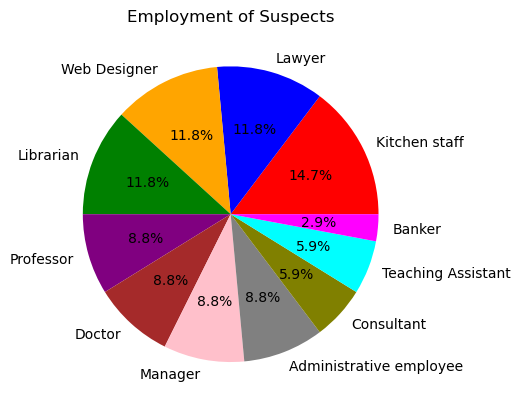

In [21]:
# Pie chart of employment of US suspects
us_suspects['employment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red','blue','orange','green', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta'])
plt.title('Employment of Suspects')
plt.ylabel('')
plt.show()


**Q8. Which profession is the least represented among the suspects the suspects who traveled to US between September 1st, 2019, and October 31st, 2020?**
 Choose from the answers on Moodle.


Banker

## Journey length

The Suisse Impossible Mission Force suspects that the rogue agent is an anomaly within his declared employment category, particularly in terms of the number of days he spent at destinations compared to his peers.

To identify such deviations, we can employ boxplots for each employment category, allowing us to visually identify outliers in the data.

First, let's construct two tables: one for the dates of arrival and another for the dates of departure. Utilize the existing dataset to extract these dates based on the 'destination' and 'departure' columns. Ensure that both the arrival and departure dates are within the period the suspect is believed to have been in the US, which is from September 2019 to October 2020.

In [22]:
# For this step we will need the information not only about the fights to the US, 
# but also about the flights taken from the US
# Filter for flights departing from the US within the specified date range
departures = suspects[(suspects['Departure'] == 'US') & (suspects['Date'] >= start_date) & (suspects['Date'] <= end_date)]
departures

arrivals = suspects[(suspects['Arrival'] == 'US') & (suspects['Date'] >= start_date) & (suspects['Date'] <= end_date)]
arrivals

,flightName,Departure,Arrival,Date,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
246,MG891910,AR,US,2020-07-16,468560,Ga******,Fe*******,2060-04-18,AR,1,2.0,Lawyer
463,OO3731010,CA,US,2020-04-10,255830,Ch*******,Be****,2059-12-26,AT,1,1.0,Professor
958,GU84573,ES,US,2020-02-10,861915,Ay***,Al*****,1978-02-26,AZ,0,1.0,Doctor
2289,TF469810,IT,US,2020-03-17,220420,Ma*****,So****,1984-12-23,BR,0,3.0,Web Designer
2702,MX97137,FR,US,2020-07-23,297653,Br***,Wo**,2068-09-22,CA,1,0.0,Lawyer
4089,NY87398,BE,US,2019-09-17,710764,Ra*****,He*******,1976-05-27,CR,0,4.0,Manager
4897,HX23943,CO,US,2020-10-10,267733,Sø***,Ma****,1998-09-14,DK,0,0.0,Kitchen staff
5349,JE532410,CH,US,2020-06-26,429697,Li**,Re****,2059-07-28,EE,1,3.0,Administrative employee
7179,LY781032,BR,US,2020-04-18,649131,Ju***,Wi****,1991-07-04,GB,1,3.0,Banker
7451,PP35996,HU,US,2020-05-03,481578,Br****,De*****,2063-07-31,GT,1,0.0,Administrative employee


We can keep on both of these tables the user ID, employment, and departure date / arrival date.

In [23]:
#keep ID employment and date columns
departures = departures[['UserID', 'employment', 'Date']]
print(departures.head())

arrivals = arrivals[['UserID', 'employment', 'Date']]
print(arrivals.head())

      UserID    employment       Date
464   255830     Professor 2020-10-07
1298  265615  Web Designer 2019-11-17
3108  494514    Consultant 2019-10-10
3958  744124        Lawyer 2020-01-13
4090  710764       Manager 2019-10-04
      UserID    employment       Date
246   468560        Lawyer 2020-07-16
463   255830     Professor 2020-04-10
958   861915        Doctor 2020-02-10
2289  220420  Web Designer 2020-03-17
2702  297653        Lawyer 2020-07-23


We can now join the two tables on user ID.

In [24]:
# Merge the arrivals and departures dataframes on the 'UserID' column
journey = pd.merge(arrivals, departures, on='UserID')
journey

,UserID,employment_x,Date_x,employment_y,Date_y
0,255830,Professor,2020-04-10,Professor,2020-10-07
1,710764,Manager,2019-09-17,Manager,2019-10-04
2,481578,Administrative employee,2020-05-03,Administrative employee,2020-07-02
3,804662,Consultant,2020-01-14,Consultant,2020-08-05
4,287607,Kitchen staff,2020-02-16,Kitchen staff,2020-06-30
5,424791,Teaching Assistant,2020-09-20,Teaching Assistant,2020-10-06
6,679196,Librarian,2020-01-23,Librarian,2020-10-29
7,556033,Web Designer,2019-10-13,Web Designer,2019-10-22
8,139646,Doctor,2019-11-10,Doctor,2020-07-29
9,628854,Manager,2020-07-29,Manager,2020-09-11


We can now create a new feature called journey_length representing the difference between departure date and arrival date.

*Hint: Ensure that journey_length is of type numeric as the box plot in the next question requires a numeric type. To convert from datetime to number of days, you can use `dt.days`*

In [25]:
#new feature journey lenght in days
journey['Journey_Length'] = (journey['Date_y'] - journey['Date_x']).dt.days
journey

,UserID,employment_x,Date_x,employment_y,Date_y,Journey_Length
0,255830,Professor,2020-04-10,Professor,2020-10-07,180
1,710764,Manager,2019-09-17,Manager,2019-10-04,17
2,481578,Administrative employee,2020-05-03,Administrative employee,2020-07-02,60
3,804662,Consultant,2020-01-14,Consultant,2020-08-05,204
4,287607,Kitchen staff,2020-02-16,Kitchen staff,2020-06-30,135
5,424791,Teaching Assistant,2020-09-20,Teaching Assistant,2020-10-06,16
6,679196,Librarian,2020-01-23,Librarian,2020-10-29,280
7,556033,Web Designer,2019-10-13,Web Designer,2019-10-22,9
8,139646,Doctor,2019-11-10,Doctor,2020-07-29,262
9,628854,Manager,2020-07-29,Manager,2020-09-11,44


*Sidenote: if you get negative journey length, what would be your explanation to that?*

We can now create the boxplots where the x-axis represents each profession and the y-axis corresponds to the journey length.

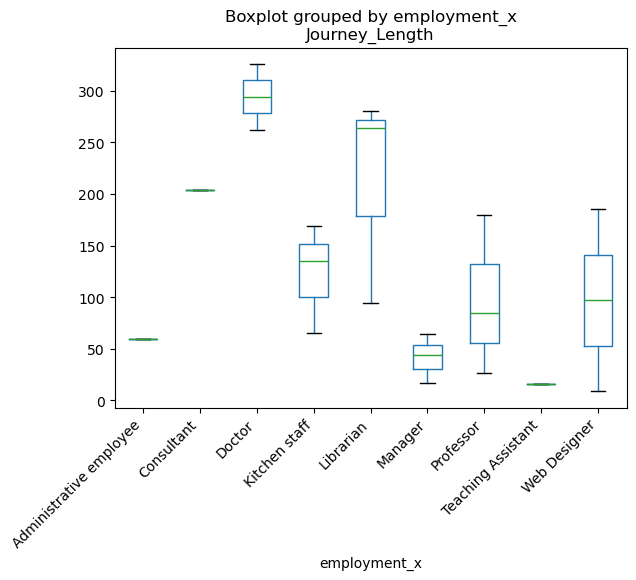

In [30]:
boxplot = journey.boxplot(column=['Journey_Length'], by='employment_x', grid=False)
plt.xticks(rotation=45, ha='right')
plt.show()

**Q9. Which profession has the most variability?**

### SIMF is satisfied with your work but believes the current data is inconclusive.

Your investigation will continue when more intelligence comes in...

**Don't forget to complete the moodle quiz ([Assignment Q1](https://moodle.unil.ch/mod/quiz/view.php?id=1744562)) and submit your code ([Code Q1](https://moodle.unil.ch/mod/assign/view.php?id=1744563)) on Moodle before Monday 30.09.2024.**